# DEFINING THE BUSINESS PROBLEM

## Defining the question.

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ad.


## Defining the metric for success.

The metric for success in this project will be well plotted visualisations to give insights on the people who are more interested in the cryptography course.


## Understanding the context

In this day and age when most people “live” on the internet, businesses have turned to the internet to search for their customers. This project aims at finding out which netizens are most interested in a cryptography course by checking whether they click on a pop up ad on the internet or not.


## Recording the experimental design.

The main aim of the project is to perform EDA to identify which individuals are most likely to click on a cryptography course ad. Data cleaning and exploratory data analysis will be done and a final documentation.


## Data relevance.

The data contains Information of people who in the past, have interacted with ads that the entreprenuer had ran about a related course. The data will be used to gain insights on who is most likely to click on the ads of the new course. The data contains variables including: Daily Time Spent on Site, Age, Area income, Daily internet usage.The variables are relevant and timely to do the analysis.


# LOADING THE DATA

In [12]:
advertising = read.csv('./advertising.csv')

## Checking the data.

In [13]:
head(advertising)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [14]:
tail(advertising)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [15]:
# Checking whether each column has an appropriate datatype.
#
str(advertising)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


Some variables do not have the right data type.
- Ad.Topic.Line, City and Country should be character string.
- Male and Clicked.on.Ad should be factors, since they are variables,
- with a limited number of different value.
- Timestamp should be a date_time.


In [16]:
# Converting the variables into the correct data types.  Converting variables
# into string

a = c("Ad.Topic.Line", "City", "Country")
for (i in a) {
    advertising[, i] = as.character(advertising[, i])
}

In [17]:
# Converting variables into factors.

b = c("Male", "Clicked.on.Ad")
for (i in b) {
    advertising[, i] = as.factor(advertising[, i])
}

In [18]:
# Convering timestamp to appropriate datatype.  The strptime command is used to
# take a string and convert it into a time data type.

advertising$Timestamp = strptime(advertising$Timestamp, "%Y-%m-%d %H:%M:%S")

In [19]:
# Confirming that all the variables have correct datatype.
str(advertising)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 2 2 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXlt, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked.on.Ad           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


## Tidying the dataset

In [20]:
# Checking for missng values.

colSums(is.na(advertising))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

There are no missing values

In [21]:
# Checking for duplicated values.

dup_advertising = advertising[duplicated(advertising), ]
dup_advertising 

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad


There are no missing values

In [22]:
# Checking column names.  The column 'Male' is better represented as gender where
# 1 is male and 0 female.

names(advertising)[names(advertising) == "Male"] <- "Gender"

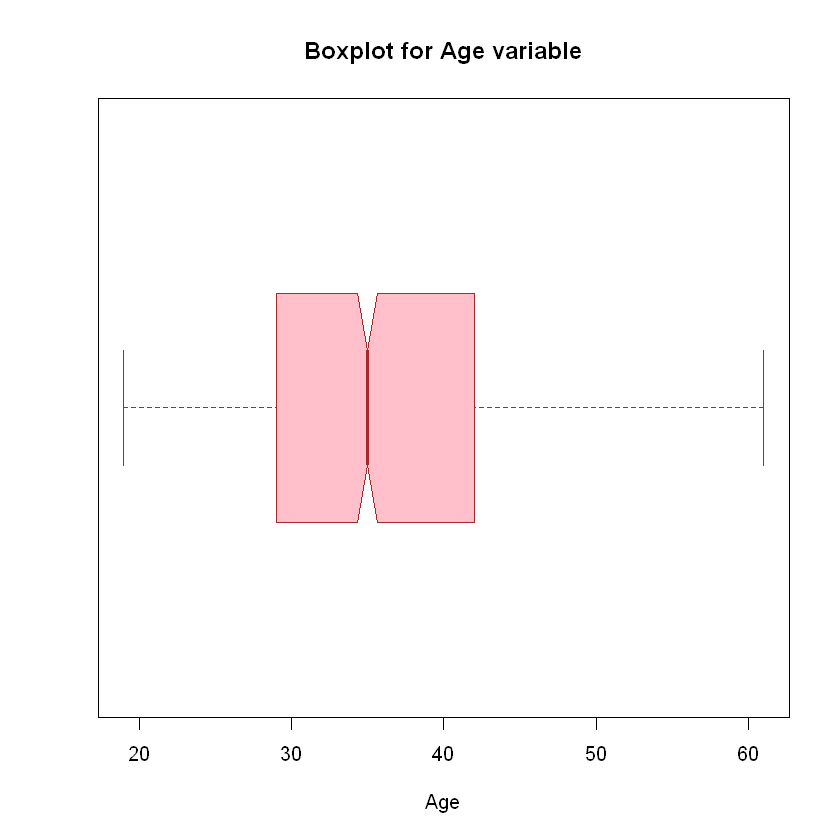

In [23]:
# Checking for outliers.
# There are 3 numeric variables.(Age, Area.Income, Daily.Internet.Usage)
# Plotting boxplots to check for outliers.
# Boxplot for age column.

bxplt_Age = boxplot(advertising$Age,
                   main = "Boxplot for Age variable",
                   xlab = "Age",
                   
                   col = "pink",
                   border = "brown",
                   horizontal = TRUE,
                   notch = TRUE
)


There are no outliers in the Area.Income.
 

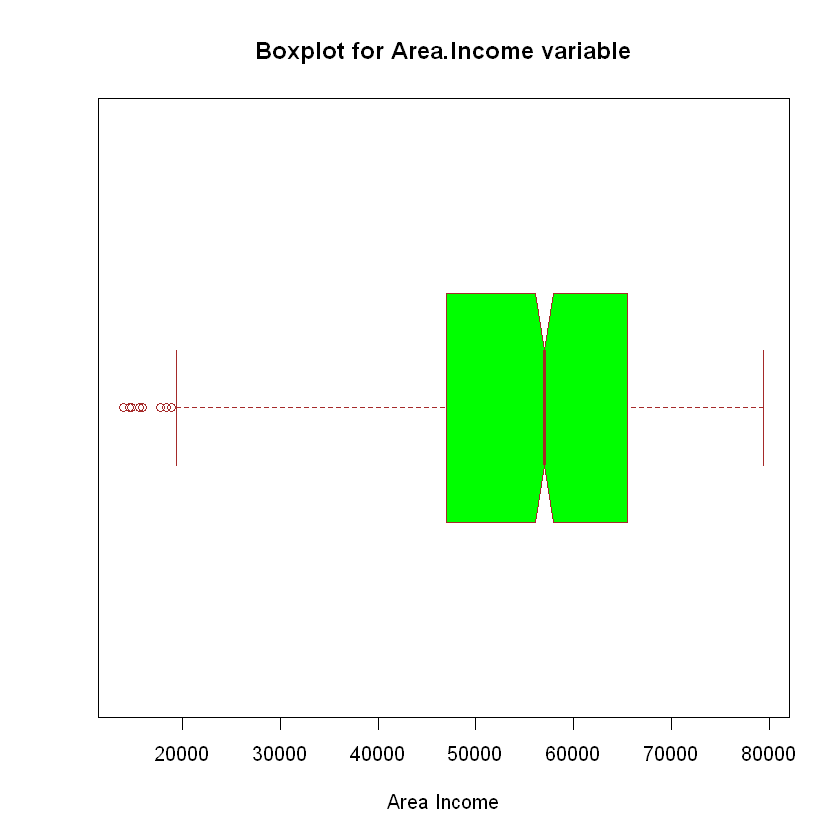

In [24]:
# Boxplot for Area.Income column.
#

bxplt_Area.Income = boxplot(advertising$Area.Income,
                    main = "Boxplot for Area.Income variable",
                    xlab = "Area Income",
                    
                    col = "green",
                    border = "brown",
                    horizontal = TRUE,
                    notch = TRUE
)

There are some outliers in the area.income variable

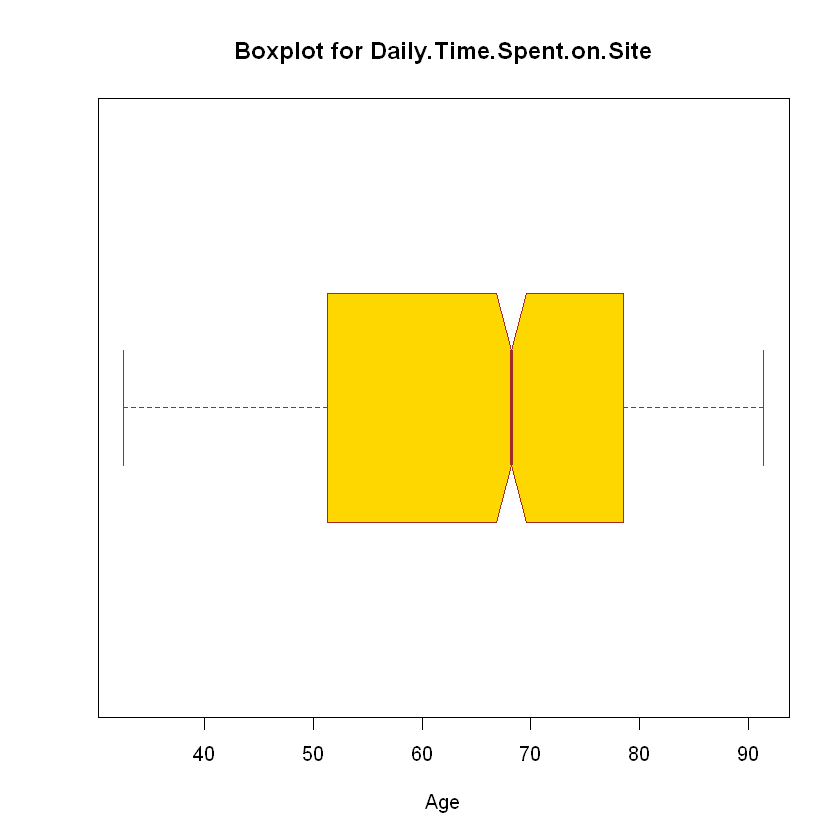

In [25]:
# Boxplot for Age column.
#

bxplt_Area.Daily.Time.Spent.on.Site = boxplot(advertising$Daily.Time.Spent.on.Site,
                    main = "Boxplot for Daily.Time.Spent.on.Site",
                    xlab = "Age",
                    
                    col = "gold",
                    border = "brown",
                    horizontal = TRUE,
                    notch = TRUE
)

No outliers in the Age column

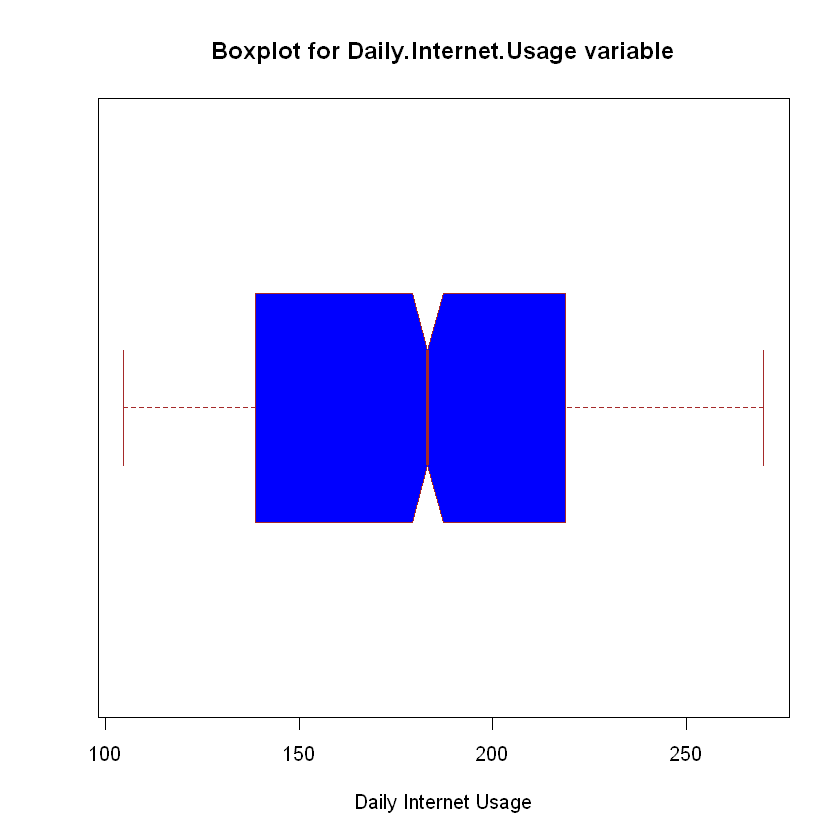

In [26]:
# Boxplot for Daily.Internet.Usage column.
#

bxplt_Daily.Internet.Usage = boxplot(advertising$Daily.Internet.Usage,
                            main = "Boxplot for Daily.Internet.Usage variable",
                            xlab = "Daily Internet Usage",
                            
                            col = "blue",
                            border = "brown",
                            horizontal = TRUE,
                            notch = TRUE
)


No outliers in the Daily.Internet.Usage column

In [27]:
# Handling the outliers in the area income variable.
# we store the outliers in a variable outliers.

outliers = bxplt_Area.Income$out
outliers

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [28]:
# This vector is to be excluded from our dataset
# The which() function tells us the rows in which the outliers exist,
# These rows will be removed from our data set.

# The dataset advertising will be stored in a new variable so as not to destroy dataset
#
adv_new = advertising
adv_new = adv_new[-which(adv_new$Area.Income %in% outliers),]

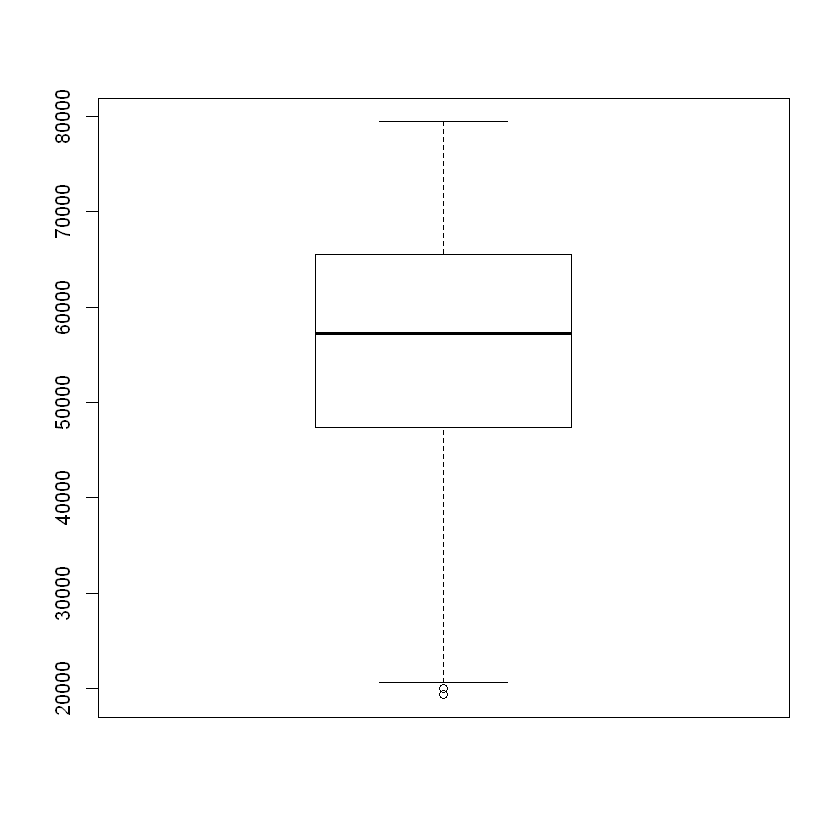

In [29]:
# Checking if the new data frame has outliers.
#
bxplt_Income = boxplot(adv_new$Area.Income)

Outliers in the area income have been removed. 
The data is now free of outliers

# EXPLORATORY DATA ANALYSIS

## Univariate Analysis

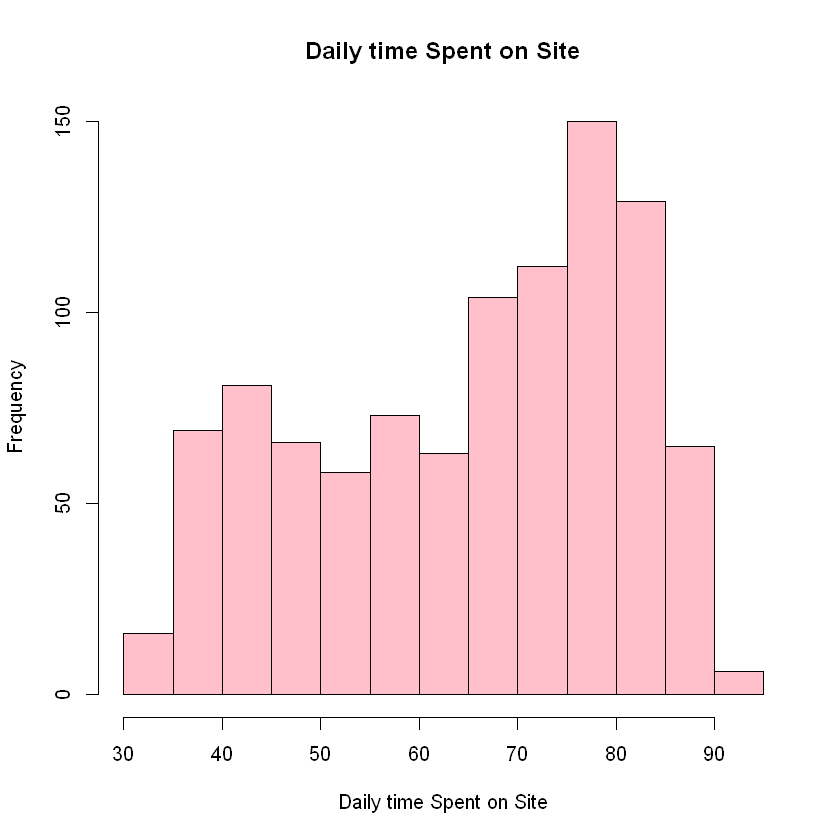

In [30]:
# Daily time spent on site distribution
#
x = hist(adv_new$Daily.Time.Spent.on.Site,
         main = "Daily time Spent on Site",
         xlab = "Daily time Spent on Site",
         col = "pink",
         )

In [31]:
summary(adv_new$Daily.Time.Spent.on.Site)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   51.28   68.39   65.04   78.58   91.43 

Daily time spent on website is skewed to the left.
This shows that generaly people spend alot of time on the website.

From the summary of the variable they spend 65 minutes on the site.


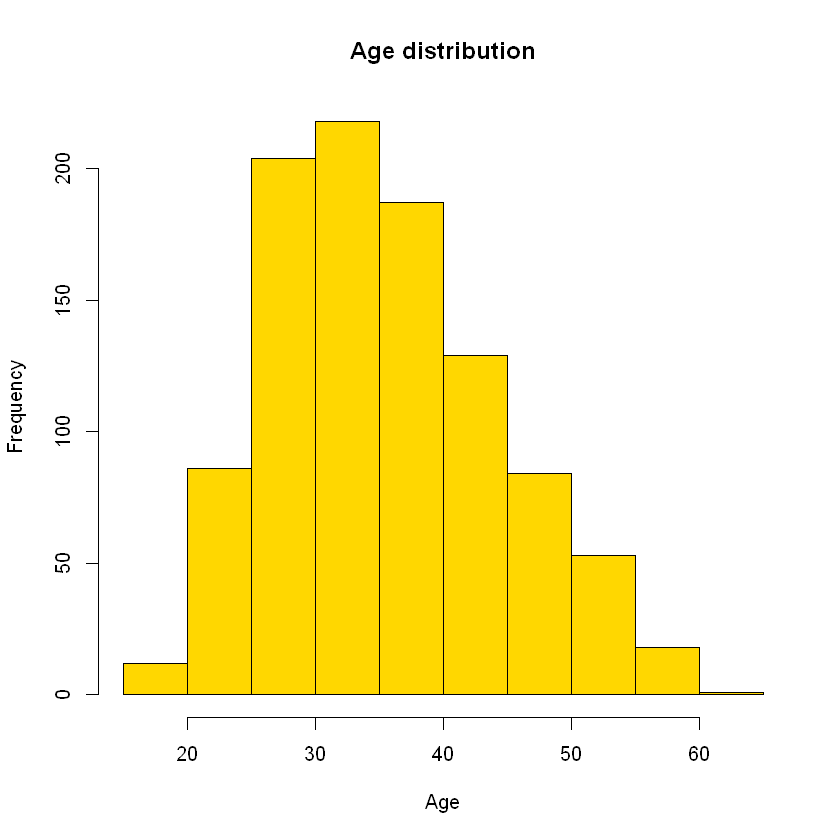

In [32]:
# Age distribution.
#

y = hist(adv_new$Age,
         main = "Age distribution",
         xlab = "Age",
         col = "gold",
)


In [33]:
summary(adv_new$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   29.00   35.00   35.98   42.00   61.00 

Age has a distribution very close to the normal distribution.
Most people visiting the site are in the (25 - 35) age bracket.
The average age of the audience is 36.


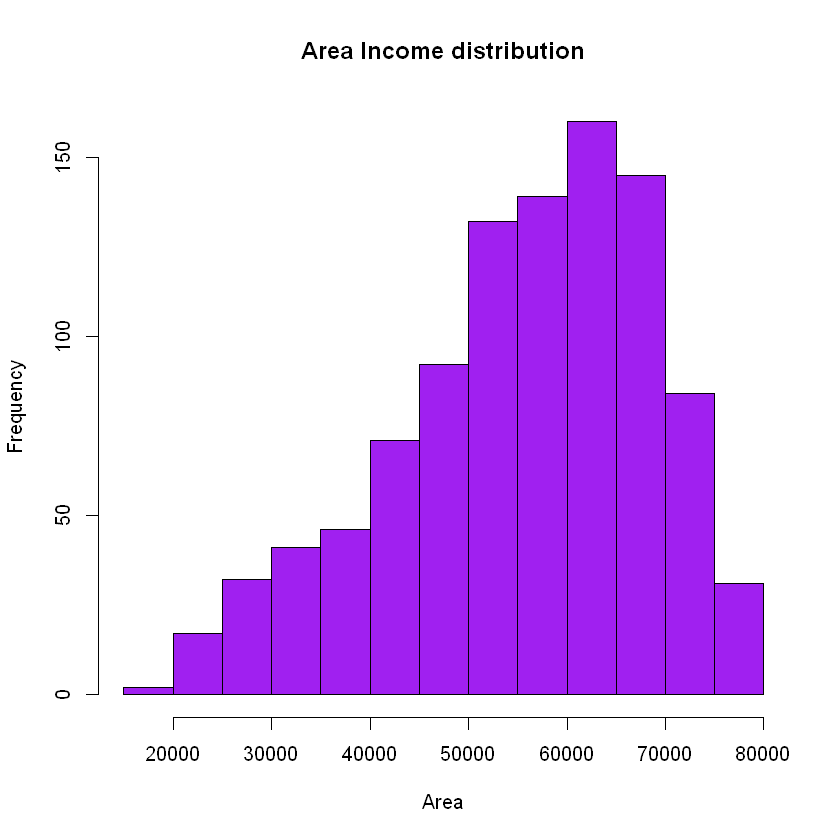

In [34]:
# Area income distribution
#

z = hist(adv_new$Area.Income,
         main = "Area Income distribution",
         xlab = "Area",
         col = "purple",
)


In [35]:
summary(adv_new$Area.Income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19345   47333   57228   55313   65519   79485 

The graph is skewed to the left.
From the graph most people have high incomes.
On average the audience has an income of 55313.

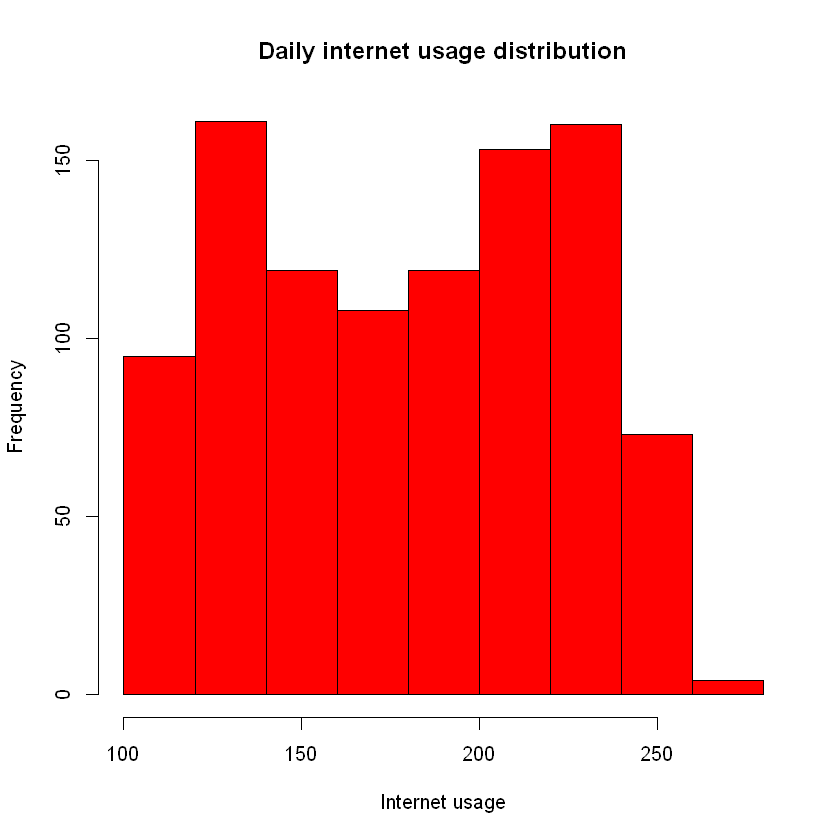

In [36]:
# Daily.Internet.Usage distribution
#

w = hist(adv_new$Daily.Internet.Usage,
         main = "Daily internet usage distribution",
         xlab = "Internet usage",
         col = "red",
)

In [37]:
summary(adv_new$Daily.Internet.Usage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.6   183.4   180.0   218.8   270.0 

Many people have a high daily internet use. Histogram is skewed to the left


In [38]:
# Gender distribution
#

gender_frequency = table(advertising$Gender)
gender_frequency


  0   1 
519 481 

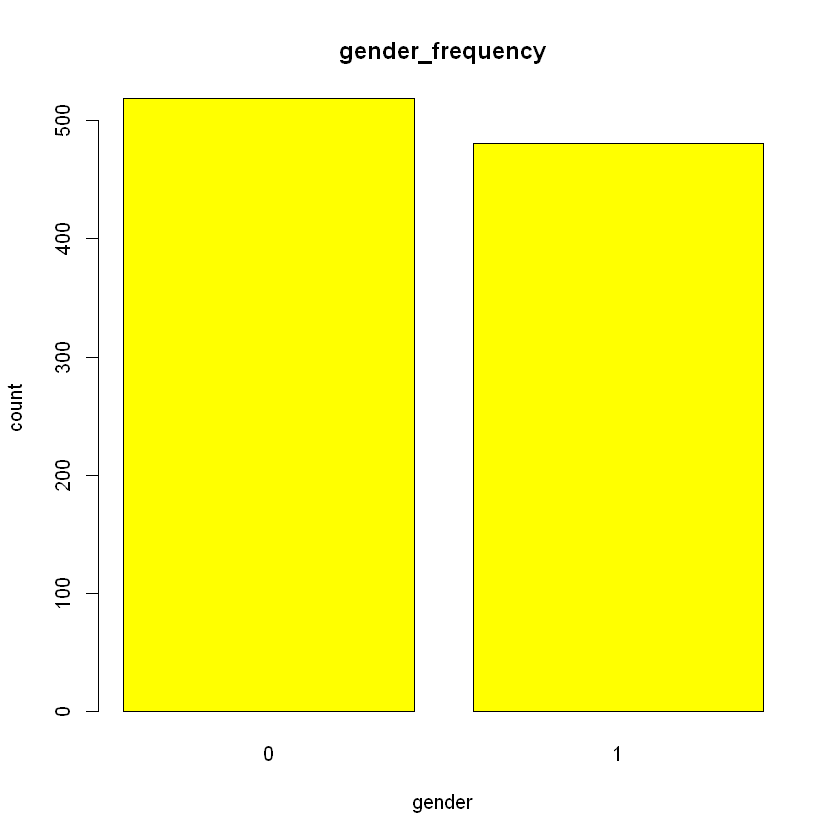

In [39]:
# Barplot for the frequency.
#
bar_gen = barplot(gender_frequency,
                  main = 'gender_frequency',
                  xlab = 'gender',
                  ylab = 'count',
                  col = 'yellow')


The females are slightly more than the males.
This data cannot be considered imbalanced in terms of gender.


In [40]:
# clicked on ad frequency distribution
#
coad_frequency = table(advertising$Clicked.on.Ad)
coad_frequency


  0   1 
500 500 

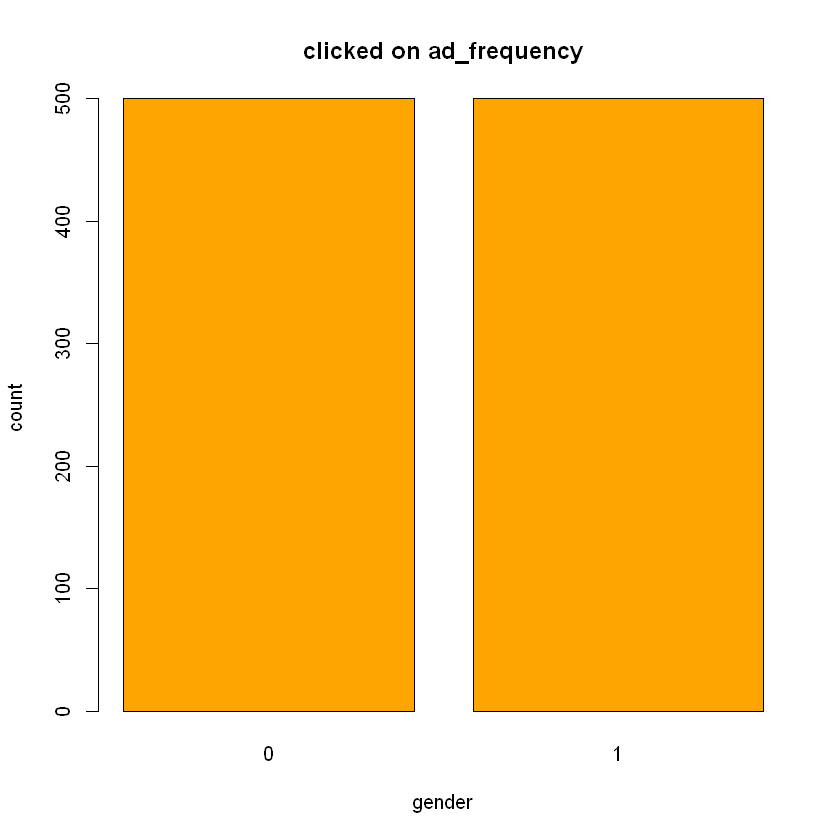

In [41]:
# Barplot for clicked on ad variable.
#
bar_coad = barplot(coad_frequency,
                  main = 'clicked on ad_frequency',
                  xlab = 'gender',
                  ylab = 'count',
                  col = 'orange')


The clicked on ad variable is the dependent variable.
The values 0 and 1 in the variable are even.
This is a perrfectly balanced dataset.
It is fit to be trained on a machine learning model.

## Bivariate analysis

In [42]:
# imorting the library ggplot2
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

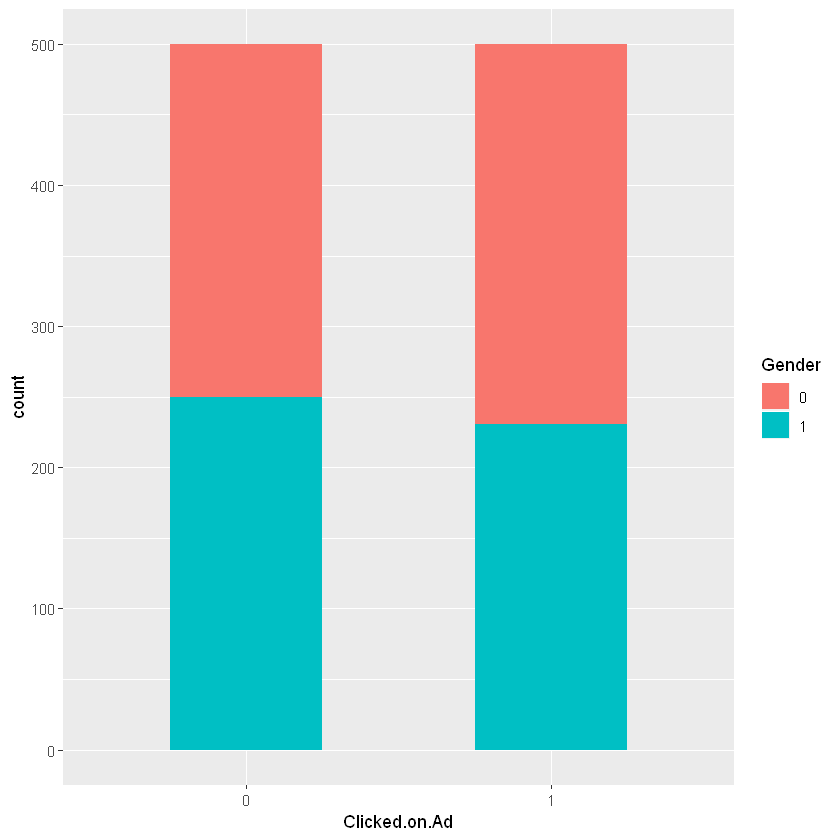

In [43]:
# Analysis to see who clicked more on the ads.
#
j = ggplot(data = advertising, aes(x = Clicked.on.Ad, fill = Gender))+ 
geom_bar(width = 0.5)
j

Slightly more males clicked on the ads compared to the women.

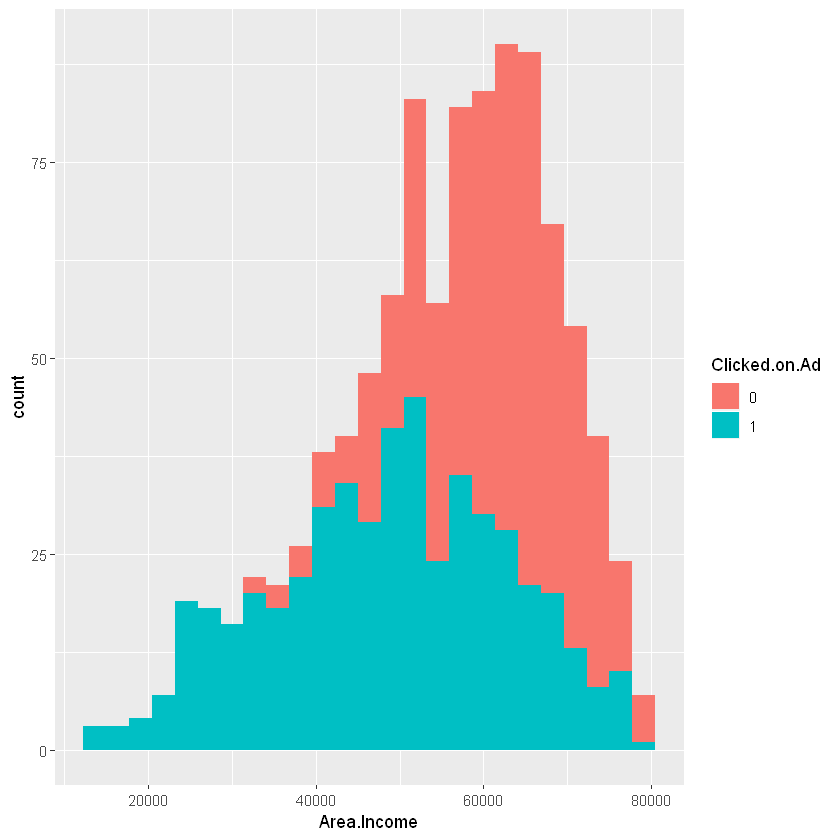

In [44]:
# Area income vs clicked on Ad.
#
k = ggplot(data = advertising, aes(x = Area.Income, fill = Clicked.on.Ad))+ 
geom_histogram(bins = 25)
k

people in the Lower income areas clicked on the Ads more.

In [45]:
#Subsetting the numerical variables to check correlations.
#

num_cols = subset(advertising, select = c("Daily.Time.Spent.on.Site", "Age", "Area.Income", "Daily.Internet.Usage"))
cor(num_cols)


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area.Income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily.Internet.Usage,0.5186585,-0.3672086,0.3374955,1.0000000


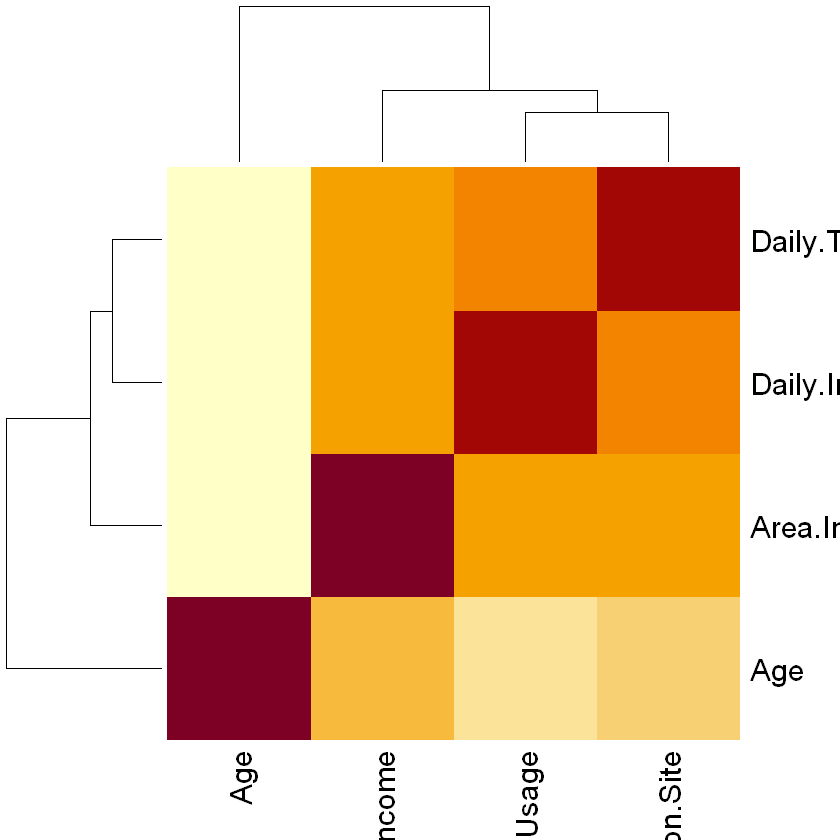

In [46]:
# Plotting a heatmap for the correlations.
heatmap(cor(num_cols))


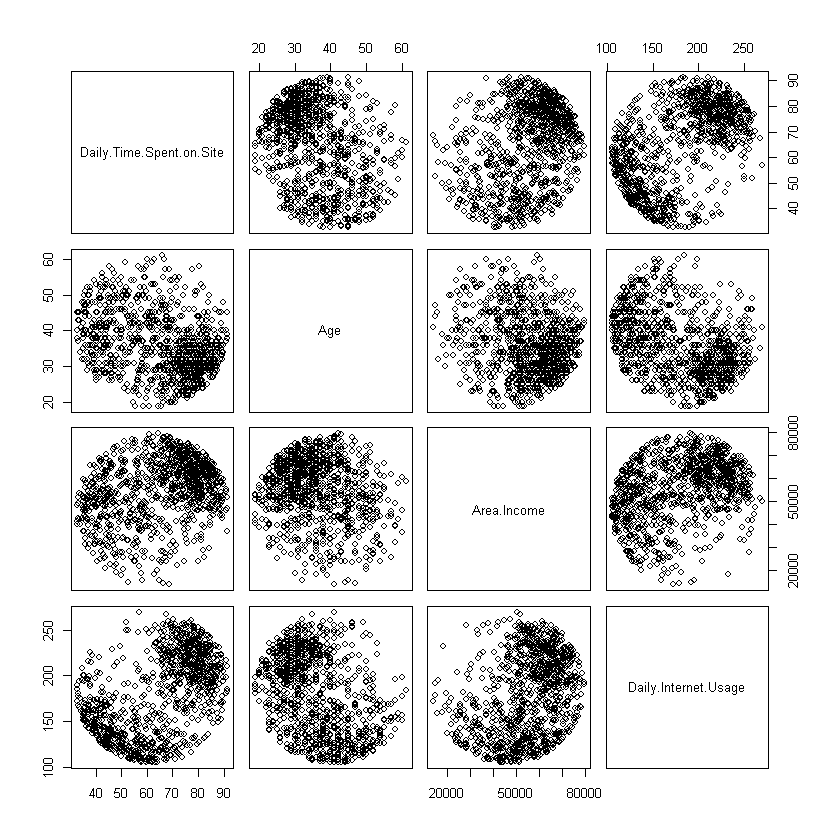

In [47]:
# pairplots to check correlation of variables.
#
pairs(num_cols)

# Recommendation after EDA
From the analysis the entrepreneur should focus on the low income areas.
Target customers around the age of 36
